In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm_notebook as tqdm
from collections import Counter

# Functions

In [242]:
a = np.array([[1,2], [3,4], [1,3]])
a = np.delete(a,[1,2], axis=0)
a

array([[1, 2]])

In [245]:
# calc ita
def get_ita(alpha, k , n0):
    return 0.5 * ((2*alpha / (k-1)) ** (-2/(n0-1))-1)
# calc h2
def get_h2(c, ita, n0):
    return 2 * c * ita * (n0-1)
# calc S2il
def get_S2(X, n0, k):
    X = X[:,:n0]
    return [[np.var(X[i]-X[l], ddof=1) for l in range(k)] for i in range(k)]
# calc Nil
def get_Nil(h2, s2, delta, k):
    return [[int(h2 * s2[i][l] / delta ** 2) for l in range(k)] for i in range(k)]
# calc Ni
def get_Ni(Nil):
    return [max(_) for _ in Nil]
# calc Xbar
def get_Xbar(X, r):
    return [np.mean(_) for _ in X[:,:r]]
# calc Wil
def get_Wil(s2, h2, delta, c, r, I_):
    return [[max(0, delta/2/c/r*(h2*s2[i][l]/delta**2 - r)) for l in I_.values()] for i in I_.values()]
# def get_Wil(s2, h2, delta, c, r, i, l):
#     return max(0, delta/2/c/r*(h2*s2[i][l]/delta**2 - r))
# update X
def add_X(X, addon):
    #[np.append(X[i],v) for i,v in enumerate(addon)]
    if X.shape[0] != len(addon): print(X.shape, len(addon))
    return np.c_[X,addon]
# update r
def add_r(r):
    return r+1
# delete i from I
def update_I(I, pop):
    new_I = {}
    [new_I.update({n:v}) for n, v in enumerate(set(I.values())-set(pop))]
    return new_I
def update_X(X, pop):
    new_X = X
    new_X = np.delete(new_X, pop, axis=0)
    return new_X
        

# check stop condition
def check_stop(I, m):
    if len(I)<=m: return 0
    else: return 1
# check each I
def screen(I, X, Xbar, Wil):
    pop_I, pop_X = [], []
    for i in I:
        if sum([Xbar[i]>=Xbar[l] - Wil[i][l] for l in I if i!=l]) == len(Wil[0])-1: continue
        #if not (False in [Xbar[i]>=Xbar[l] - get_Wil(s2, h2, DELTA, c, r,I[i],I[l]) for l in I if i!=l]): continue
        else: 
            pop_I.append(I[i])
            #print('remove{}'.format(I[i]))
            pop_X.append(i)
    I = update_I(I, pop_I)
    X = update_X(X, pop_X)
    return I, X
# screening
def screening(I, X, Xbar, S2, h2, delta, c, r, k):
    Wil = get_Wil(S2, h2, delta, c, r, I)
    I, X = screen(I, X, Xbar, Wil)
    #I, X = screen(I, X, Xbar,S2, h2)
    return I, X


# Parameters

In [15]:
c = 1
k = 5 # number of settings
n0 = 24

# constant
ALPHA = 0.05
CL = 1 - ALPHA # confidence level
DELTA = (1/n0)**0.5

m = 1 # stop number condition

setting = [[0,1],
          [0, 1],
          [0, 1],
          [DELTA, 1],
          [0, 1],]

# Input

In [247]:
Ita = get_ita(ALPHA, k, n0)

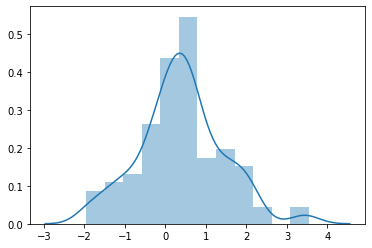

In [28]:
sb.distplot(np.random.normal(loc=setting[4][0],scale=setting[4][1],size=100))

In [248]:
X = np.array([np.random.normal(loc=setting[i][0],scale=setting[i][1],size=n0) for i in range(k)])

# Initialization

In [249]:
I = {} # keep a dict to identify the initial index of each row left in the X
[I.update({_:_}) for _ in range(k)] 
h2 = get_h2(c, Ita, n0)
S2 = get_S2(X, n0, k)
Nil = get_Nil(h2, S2, DELTA, k)
Ni = get_Ni(Nil)
Xbar = get_Xbar(X, n0)

# Stop at initialization

In [250]:
if n0 > max(Ni): 
    print('{} is the best!'.format(np.argmax(Xbar)))
else: r = n0
# then the screening process

# Screening

In [251]:
best = []
counter  = n0*k
while check_stop(I, m): 
    x_addon = [np.random.normal(loc=setting[i][0],scale=setting[i][1],size=1) for i in sorted(I.values())]
    counter += len(x_addon)
    X, r = add_X(X, x_addon), add_r(r)
    Xbar = get_Xbar(X, r)
    if r == 1 + max([Ni[i] for i in I.values()]):
        best.append(I[np.argmax(Xbar)])
        print('stopped at here!')
        break
        # 处理m个
    else:
        I, X = screening(I, X, Xbar, S2, h2, DELTA, c, r, k)
        print(I)
        k = len(I)
best += I.values()
best, counter

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1

([4], 610)

# Temporary test

In [187]:
def knrs(c, k, n0, ALPHA, CL, DELTA, m, setting):
    Ita = get_ita(ALPHA, k, n0)
    X = np.array([np.random.normal(loc=setting[i][0],scale=setting[i][1],size=n0) for i in range(k)])
    I = {} # keep a dict to identify the initial index of each row left in the X
    [I.update({_:_}) for _ in range(k)] 
    h2 = get_h2(c, Ita, n0)
    S2 = get_S2(X, n0, k)
    Nil = get_Nil(h2, S2, DELTA, k)
    Ni = get_Ni(Nil)
    Xbar = get_Xbar(X, n0)
    best = 0
    counter  = n0*k
    if n0 > max(Ni): 
        best = np.argmax(Xbar)
        print('{} is the best!'.format(best))
    else: r = n0
    while check_stop(I, m): 
        x_addon = [np.random.normal(loc=setting[i][0],scale=setting[i][1],size=1) for i in I.values()]
        counter += len(x_addon)
        X, r = add_X(X, x_addon), add_r(r)
        Xbar = get_Xbar(X, r)
        if r == 1 + max([Ni[i] for i in I.values()]):
            best = I[np.argmax(Xbar)]
            print('stopped at here!')
            break
            # 处理m个
        else:
            I, X = screening(I, X, Xbar, S2, h2, DELTA, c, r, k)
            #print(I)
            k = len(I)
    value = [_ for _ in I.values()]
    best = value[0]
    return best, counter

In [188]:
knrs(c, k, n0, ALPHA, CL, DELTA, m, setting)

(0, 485)

In [29]:
from ifttt_notify import send_notice

ModuleNotFoundError: No module named 'ifttt_notify'

# Test version: use normal distribution input

In [41]:
class KNRanking_and_Selection():
    def __init__(self, c, k, n0, ALPHA, m, setting):
        self.c = 1
        # constant
        self.ALPHA = 0.05
        self.CL = 1 - ALPHA # confidence level
        self.m = 1 # stop number condition
        self.setting = setting
        self.DELTA = 1/n0**0.5
        
        self.init_k = 5 # number of settings
        self.init_n0 = 24
        self.init_Ita = self.get_ita(ALPHA, k, n0)
            
    def initialize(self):
        self.k = self.init_k 
        self.n0 = self.init_n0 
        self.Ita = self.init_Ita
        self.I = {} # keep a dict to identify the initial index of each row left in the X
        [self.I.update({_:_}) for _ in range(self.k)] 
        self.X = np.array([np.random.normal(loc=setting[i][0],scale=setting[i][1],size=n0) for i in range(k)])
        self.h2 = self.get_h2(self.c, self.Ita, self.n0)
        self.S2 = self.get_S2(self.X, self.n0, self.k)
        self.Nil = self.get_Nil(self.h2, self.S2, self.DELTA, self.k)
        self.Ni = self.get_Ni(self.Nil)
        self.Xbar = self.get_Xbar(self.X, self.n0)
        
        self.counter = self.n0*k
        print(self.Nil)
    
    def initial_check(self):
        if self.n0 > max(self.Ni): 
            t  = np.argmax(self.Xbar)
            print('{} is the best!'.format(t))
            self.I = [t]
            return 1
        else: 
            self.r = self.n0
            return 0
        
    # calc ita
    def get_ita(self, alpha, k , n0):
        return 0.5 * ((2*alpha / (k-1)) ** (-2/(n0-1))-1)
    # calc h2
    def get_h2(self, c, ita, n0):
        return 2 * c * ita * (n0-1)
    # calc S2il
    def get_S2(self, X, n0, k):
        X = X[:,:n0]
        return [[np.var(X[i]-X[l], ddof=1) for l in range(k)] for i in range(k)]
    # calc Nil
    def get_Nil(self, h2, s2, delta, k):
        return [[int(h2 * s2[i][l] / delta ** 2) for l in range(k)] for i in range(k)]
    # calc Ni
    def get_Ni(self, Nil):
        return [max(_) for _ in Nil]
    # calc Xbar
    def get_Xbar(self, X, r):
        return [np.mean(_) for _ in X[:,:r]]
    # calc Wil
    def get_Wil(self, s2, h2, delta, c, r, I_):
        return [[max(0, delta/2/c/r*(h2*s2[i][l]/delta**2 - r)) for l in I_.values()] for i in I_.values()]
    # update X
    def add_X(self, X, addon):
        #[np.append(X[i],v) for i,v in enumerate(addon)]
        return np.c_[X, addon]
    # update r
    def add_r(self, r):
        return r+1
    # delete i from I
    def update_I(self, I, pop):
        new_I = {}
        [new_I.update({n:v}) for n, v in enumerate(set(I.values())-set(pop))]
        return new_I
    def update_X(self, X, pop):
        new_X = X
        new_X = np.delete(new_X, pop, axis=0)
        return new_X
    # check stop condition
    def check_stop(self, I, m):
        if len(I)<=m: return 0
        else: return 1
    # check each I
    def screen(self, I, X, Xbar, Wil):
        pop_I, pop_X = [], []
        for i in I:
            if sum([Xbar[i]>=Xbar[l] - Wil[i][l] for l in I if i!=l]) == len(Wil[0])-1: continue
            else: 
                pop_I.append(I[i])
                #print('remove{}'.format(I[i]))
                pop_X.append(i)
        I = self.update_I(I, pop_I)
        X = self.update_X(X, pop_X)
        return I, X
    # screening
    def screening(self, I, X, Xbar, S2, h2, delta, c, r):
        Wil = self.get_Wil(S2, h2, delta, c, r, I)
        I, X = self.screen(I, X, Xbar, Wil)
        return I, X
    
    def loop_filter(self):
        best = []
        while self.check_stop(self.I, self.m): 
            x_addon = [np.random.normal(loc=self.setting[i][0],scale=self.setting[i][1],size=1) for i in self.I.values()]
            self.counter += len(x_addon)
            self.X, self.r = self.add_X(self.X, x_addon), self.add_r(self.r)
            self.Xbar = self.get_Xbar(self.X, self.r)
            if self.r == 1 + max([self.Ni[i] for i in self.I.values()]):
                best.append(self.I[np.argmax(self.Xbar)])
                print('stopped at here!')
                break
                # 处理m个
            else:
                self.I, self.X = self.screening(self.I, self.X, self.Xbar, self.S2, self.h2, self.DELTA, self.c, self.r)
                #print(self.I)
                self.k = len(self.I)
        best += self.I.values()
        return best

    def main(self):
        self.initialize()
        if not self.initial_check():
            self.loop_filter()
        value = [_ for _ in self.I.values()][0]
        return value, self.counter
        
        

In [42]:
rs = KNRanking_and_Selection(c, k, n0, ALPHA, m, setting)

In [43]:
Macro_run = 1
re = []
for i in tqdm(range(Macro_run)):
    re += rs.main()


re = np.array(re).reshape(-1,2)

[[0, 595, 562, 761, 435], [595, 0, 459, 498, 576], [562, 459, 0, 453, 339], [761, 498, 453, 0, 402], [435, 576, 339, 402, 0]]



In [44]:
Macro_run = 500
re = []
for i in tqdm(range(Macro_run)):
    re += rs.main()

re = np.array(re).reshape(-1,2)

[[0, 318, 862, 411, 453], [318, 0, 520, 375, 360], [862, 520, 0, 941, 841], [411, 375, 941, 0, 489], [453, 360, 841, 489, 0]]
[[0, 364, 392, 319, 360], [364, 0, 320, 513, 439], [392, 320, 0, 437, 257], [319, 513, 437, 0, 490], [360, 439, 257, 490, 0]]
[[0, 445, 281, 696, 339], [445, 0, 286, 867, 554], [281, 286, 0, 590, 407], [696, 867, 590, 0, 552], [339, 554, 407, 552, 0]]
[[0, 643, 598, 829, 474], [643, 0, 282, 450, 496], [598, 282, 0, 581, 549], [829, 450, 581, 0, 335], [474, 496, 549, 335, 0]]
[[0, 522, 380, 347, 462], [522, 0, 409, 466, 511], [380, 409, 0, 329, 397], [347, 466, 329, 0, 196], [462, 511, 397, 196, 0]]
[[0, 502, 266, 392, 449], [502, 0, 363, 508, 487], [266, 363, 0, 244, 459], [392, 508, 244, 0, 522], [449, 487, 459, 522, 0]]
[[0, 388, 253, 377, 304], [388, 0, 370, 509, 451], [253, 370, 0, 425, 297], [377, 509, 425, 0, 385], [304, 451, 297, 385, 0]]
[[0, 242, 452, 417, 290], [242, 0, 456, 430, 318], [452, 456, 0, 828, 473], [417, 430, 828, 0, 546], [290, 318, 473, 5

[[0, 533, 523, 381, 542], [533, 0, 534, 486, 515], [523, 534, 0, 374, 405], [381, 486, 374, 0, 330], [542, 515, 405, 330, 0]]
[[0, 717, 447, 563, 387], [717, 0, 395, 347, 472], [447, 395, 0, 263, 614], [563, 347, 263, 0, 512], [387, 472, 614, 512, 0]]
[[0, 483, 325, 364, 321], [483, 0, 544, 391, 725], [325, 544, 0, 245, 362], [364, 391, 245, 0, 488], [321, 725, 362, 488, 0]]
[[0, 229, 406, 342, 341], [229, 0, 568, 423, 427], [406, 568, 0, 546, 301], [342, 423, 546, 0, 550], [341, 427, 301, 550, 0]]
[[0, 595, 484, 421, 602], [595, 0, 403, 267, 328], [484, 403, 0, 384, 241], [421, 267, 384, 0, 357], [602, 328, 241, 357, 0]]
[[0, 567, 391, 481, 759], [567, 0, 568, 800, 587], [391, 568, 0, 752, 701], [481, 800, 752, 0, 568], [759, 587, 701, 568, 0]]
[[0, 345, 331, 250, 314], [345, 0, 351, 369, 403], [331, 351, 0, 270, 348], [250, 369, 270, 0, 229], [314, 403, 348, 229, 0]]
[[0, 314, 365, 513, 409], [314, 0, 319, 394, 650], [365, 319, 0, 806, 389], [513, 394, 806, 0, 697], [409, 650, 389, 6

[[0, 311, 306, 343, 499], [311, 0, 291, 443, 630], [306, 291, 0, 498, 387], [343, 443, 498, 0, 627], [499, 630, 387, 627, 0]]
[[0, 370, 362, 486, 719], [370, 0, 753, 325, 760], [362, 753, 0, 641, 639], [486, 325, 641, 0, 547], [719, 760, 639, 547, 0]]
[[0, 377, 287, 439, 388], [377, 0, 318, 210, 192], [287, 318, 0, 412, 388], [439, 210, 412, 0, 296], [388, 192, 388, 296, 0]]
[[0, 577, 216, 212, 336], [577, 0, 744, 478, 484], [216, 744, 0, 367, 387], [212, 478, 367, 0, 372], [336, 484, 387, 372, 0]]
[[0, 320, 421, 470, 326], [320, 0, 302, 387, 314], [421, 302, 0, 396, 480], [470, 387, 396, 0, 395], [326, 314, 480, 395, 0]]
[[0, 279, 675, 563, 651], [279, 0, 432, 553, 619], [675, 432, 0, 622, 602], [563, 553, 622, 0, 417], [651, 619, 602, 417, 0]]
[[0, 418, 346, 403, 355], [418, 0, 425, 494, 381], [346, 425, 0, 326, 353], [403, 494, 326, 0, 493], [355, 381, 353, 493, 0]]
[[0, 417, 227, 386, 447], [417, 0, 443, 397, 461], [227, 443, 0, 307, 368], [386, 397, 307, 0, 317], [447, 461, 368, 3

[[0, 368, 417, 449, 367], [368, 0, 560, 528, 579], [417, 560, 0, 483, 330], [449, 528, 483, 0, 602], [367, 579, 330, 602, 0]]
[[0, 284, 440, 385, 444], [284, 0, 522, 492, 562], [440, 522, 0, 573, 216], [385, 492, 573, 0, 371], [444, 562, 216, 371, 0]]
[[0, 452, 276, 280, 375], [452, 0, 684, 471, 450], [276, 684, 0, 432, 503], [280, 471, 432, 0, 343], [375, 450, 503, 343, 0]]
[[0, 650, 430, 659, 474], [650, 0, 641, 695, 710], [430, 641, 0, 529, 634], [659, 695, 529, 0, 650], [474, 710, 634, 650, 0]]
[[0, 354, 453, 386, 697], [354, 0, 343, 390, 404], [453, 343, 0, 325, 611], [386, 390, 325, 0, 406], [697, 404, 611, 406, 0]]
[[0, 623, 581, 739, 653], [623, 0, 405, 456, 339], [581, 405, 0, 359, 657], [739, 456, 359, 0, 583], [653, 339, 657, 583, 0]]
[[0, 454, 573, 325, 336], [454, 0, 463, 389, 346], [573, 463, 0, 476, 295], [325, 389, 476, 0, 310], [336, 346, 295, 310, 0]]
[[0, 392, 270, 290, 451], [392, 0, 444, 224, 359], [270, 444, 0, 490, 521], [290, 224, 490, 0, 345], [451, 359, 521, 3

[[0, 324, 286, 367, 402], [324, 0, 353, 398, 498], [286, 353, 0, 378, 586], [367, 398, 378, 0, 406], [402, 498, 586, 406, 0]]
[[0, 521, 397, 355, 446], [521, 0, 290, 318, 330], [397, 290, 0, 232, 305], [355, 318, 232, 0, 255], [446, 330, 305, 255, 0]]
[[0, 386, 476, 537, 403], [386, 0, 437, 702, 516], [476, 437, 0, 510, 482], [537, 702, 510, 0, 516], [403, 516, 482, 516, 0]]
[[0, 262, 330, 215, 481], [262, 0, 341, 227, 349], [330, 341, 0, 193, 316], [215, 227, 193, 0, 417], [481, 349, 316, 417, 0]]
[[0, 421, 313, 331, 223], [421, 0, 526, 529, 360], [313, 526, 0, 237, 307], [331, 529, 237, 0, 277], [223, 360, 307, 277, 0]]
[[0, 299, 216, 460, 490], [299, 0, 345, 528, 335], [216, 345, 0, 338, 492], [460, 528, 338, 0, 633], [490, 335, 492, 633, 0]]
[[0, 514, 468, 325, 348], [514, 0, 519, 464, 526], [468, 519, 0, 328, 427], [325, 464, 328, 0, 485], [348, 526, 427, 485, 0]]
[[0, 493, 441, 602, 479], [493, 0, 428, 374, 416], [441, 428, 0, 440, 509], [602, 374, 440, 0, 567], [479, 416, 509, 5

[[0, 443, 509, 217, 157], [443, 0, 392, 301, 423], [509, 392, 0, 470, 515], [217, 301, 470, 0, 266], [157, 423, 515, 266, 0]]
[[0, 430, 571, 395, 419], [430, 0, 389, 280, 215], [571, 389, 0, 580, 617], [395, 280, 580, 0, 338], [419, 215, 617, 338, 0]]
[[0, 275, 480, 365, 244], [275, 0, 405, 469, 370], [480, 405, 0, 564, 429], [365, 469, 564, 0, 356], [244, 370, 429, 356, 0]]
[[0, 320, 281, 333, 417], [320, 0, 267, 412, 476], [281, 267, 0, 406, 456], [333, 412, 406, 0, 422], [417, 476, 456, 422, 0]]
[[0, 348, 311, 354, 275], [348, 0, 438, 366, 270], [311, 438, 0, 300, 216], [354, 366, 300, 0, 250], [275, 270, 216, 250, 0]]
[[0, 279, 263, 443, 446], [279, 0, 511, 537, 341], [263, 511, 0, 487, 506], [443, 537, 487, 0, 418], [446, 341, 506, 418, 0]]
[[0, 344, 314, 263, 291], [344, 0, 411, 490, 507], [314, 411, 0, 414, 255], [263, 490, 414, 0, 300], [291, 507, 255, 300, 0]]
[[0, 177, 334, 339, 392], [177, 0, 612, 645, 616], [334, 612, 0, 422, 482], [339, 645, 422, 0, 549], [392, 616, 482, 5

[[0, 481, 566, 421, 470], [481, 0, 464, 412, 367], [566, 464, 0, 439, 566], [421, 412, 439, 0, 520], [470, 367, 566, 520, 0]]
[[0, 402, 344, 708, 419], [402, 0, 358, 416, 220], [344, 358, 0, 380, 373], [708, 416, 380, 0, 543], [419, 220, 373, 543, 0]]
[[0, 249, 261, 302, 466], [249, 0, 383, 415, 412], [261, 383, 0, 382, 561], [302, 415, 382, 0, 226], [466, 412, 561, 226, 0]]
[[0, 395, 418, 371, 504], [395, 0, 578, 373, 535], [418, 578, 0, 323, 434], [371, 373, 323, 0, 395], [504, 535, 434, 395, 0]]
[[0, 434, 530, 619, 424], [434, 0, 464, 458, 511], [530, 464, 0, 617, 611], [619, 458, 617, 0, 489], [424, 511, 611, 489, 0]]
[[0, 530, 776, 583, 620], [530, 0, 425, 387, 417], [776, 425, 0, 693, 587], [583, 387, 693, 0, 342], [620, 417, 587, 342, 0]]
[[0, 304, 224, 795, 385], [304, 0, 249, 785, 280], [224, 249, 0, 519, 186], [795, 785, 519, 0, 448], [385, 280, 186, 448, 0]]
[[0, 453, 358, 290, 683], [453, 0, 435, 555, 404], [358, 435, 0, 343, 448], [290, 555, 343, 0, 501], [683, 404, 448, 5

[[0, 352, 355, 611, 333], [352, 0, 413, 257, 252], [355, 413, 0, 586, 449], [611, 257, 586, 0, 325], [333, 252, 449, 325, 0]]
[[0, 661, 450, 322, 318], [661, 0, 528, 543, 554], [450, 528, 0, 278, 322], [322, 543, 278, 0, 359], [318, 554, 322, 359, 0]]
[[0, 340, 397, 402, 259], [340, 0, 499, 438, 360], [397, 499, 0, 468, 409], [402, 438, 468, 0, 370], [259, 360, 409, 370, 0]]
[[0, 308, 378, 334, 477], [308, 0, 249, 396, 420], [378, 249, 0, 304, 394], [334, 396, 304, 0, 344], [477, 420, 394, 344, 0]]
[[0, 526, 682, 862, 591], [526, 0, 599, 577, 695], [682, 599, 0, 605, 753], [862, 577, 605, 0, 494], [591, 695, 753, 494, 0]]
[[0, 426, 637, 311, 374], [426, 0, 523, 516, 279], [637, 523, 0, 352, 328], [311, 516, 352, 0, 418], [374, 279, 328, 418, 0]]
[[0, 389, 256, 564, 335], [389, 0, 353, 572, 197], [256, 353, 0, 421, 228], [564, 572, 421, 0, 300], [335, 197, 228, 300, 0]]
[[0, 515, 265, 338, 433], [515, 0, 363, 302, 732], [265, 363, 0, 294, 456], [338, 302, 294, 0, 331], [433, 732, 456, 3

In [61]:
re

array([[dict_values([0]), 566],
       [dict_values([0]), 265],
       [dict_values([2]), 602],
       [dict_values([1]), 369],
       [dict_values([0]), 415],
       [dict_values([0]), 264],
       [dict_values([4]), 553],
       [dict_values([0]), 850],
       [dict_values([0]), 273],
       [dict_values([0]), 225],
       [dict_values([4]), 680],
       [dict_values([0]), 309],
       [dict_values([3]), 821],
       [dict_values([0]), 171],
       [dict_values([0]), 471],
       [dict_values([0]), 889],
       [dict_values([0]), 166],
       [dict_values([1]), 611],
       [dict_values([2]), 391],
       [dict_values([0]), 340],
       [dict_values([0]), 459],
       [dict_values([4]), 423],
       [dict_values([0]), 273],
       [dict_values([1]), 667],
       [dict_values([0]), 405],
       [dict_values([0]), 461],
       [dict_values([0]), 189],
       [dict_values([4]), 349],
       [dict_values([2]), 470],
       [dict_values([4]), 132],
       [dict_values([0]), 299],
       [

In [273]:
np.mean(re[:,1])

732.034

In [13]:
setting

[[0.2041241452319315, 1],
 [-0.2041241452319315, 1],
 [-0.6123724356957945, 1],
 [-1.0206207261596576, 1],
 [-1.4288690166235205, 1]]

In [45]:
Counter(re[:,0]), np.mean(re[:,1])

(Counter({3: 487, 4: 3, 0: 5, 1: 3, 2: 2}), 722.576)

# import class from py file

In [30]:
from KNFullySequentialIndifferenceZoneMethod import KNRanking_and_Selection

In [32]:
kn = KNRanking_and_Selection(c, k, n0, ALPHA, DELTA, setting)
kn.main()

(3, 749)

In [35]:
Macro_run = 500
re = []
for i in tqdm(range(Macro_run)):
    re += kn.main()

re = np.array(re).reshape(-1,2)

In [36]:
Counter(re[:,0]), np.mean(re[:,1])

(Counter({3: 479, 0: 5, 4: 4, 1: 9, 2: 3}), 735.186)

In [49]:
dict(Counter(re[:,0]))

{3: 487, 4: 3, 0: 5, 1: 3, 2: 2}

# Simulation version

In [ ]:
class KNRanking_and_Selection():
    def __init__(self, c, k, n0, ALPHA, m, x_add):
        self.c = 1
        # constant
        self.ALPHA = 0.05
        self.CL = 1 - ALPHA # confidence level
        self.m = 1 # stop number condition
        self.setting = setting
        self.DELTA = 1/n0**0.5
        
        self.init_k = 5 # number of settings
        self.init_n0 = 24
        self.init_Ita = self.get_ita(ALPHA, k, n0)
        def load_X(address):
            X = pd.read_csv(address)
            X['l'] = 1-X['l']
            return np.array([X[X.smt == i]['l'].values for i in range(1,10)])
        self.init_X = load_X(x_add)
        
            
    def initialize(self):
        self.k = self.init_k 
        self.n0 = self.init_n0 
        self.Ita = self.init_Ita
        self.I = {} # keep a dict to identify the initial index of each row left in the X
        def get_X(X,n0):
            return X[:,:n0]
        self.X = get_X(self.init_X, self.n0)
        [self.I.update({_:_}) for _ in range(self.k)] 
        #self.X = np.array([np.random.normal(loc=setting[i][0],scale=setting[i][1],size=n0) for i in range(k)])
        self.h2 = self.get_h2(self.c, self.Ita, self.n0)
        self.S2 = self.get_S2(self.X, self.n0, self.k)
        self.Nil = self.get_Nil(self.h2, self.S2, self.DELTA, self.k)
        self.Ni = self.get_Ni(self.Nil)
        self.Xbar = self.get_Xbar(self.X, self.n0)
        
        self.counter = self.n0*k
    
    def initial_check(self):
        if self.n0 > max(self.Ni): 
            t = np.argmax(self.Xbar)
            #print('{} is the best!'.format(t))
            self.I = {t:t}
            return 1
        else: 
            self.r = self.n0
            return 0
        
    # calc ita
    def get_ita(self, alpha, k , n0):
        return 0.5 * ((2*alpha / (k-1)) ** (-2/(n0-1))-1)
    # calc h2
    def get_h2(self, c, ita, n0):
        return 2 * c * ita * (n0-1)
    # calc S2il
    def get_S2(self, X, n0, k):
        X = X[:,:n0]
        return [[np.var(X[i]-X[l], ddof=1) for l in range(k)] for i in range(k)]
    # calc Nil
    def get_Nil(self, h2, s2, delta, k):
        return [[int(h2 * s2[i][l] / delta ** 2) for l in range(k)] for i in range(k)]
    # calc Ni
    def get_Ni(self, Nil):
        return [max(_) for _ in Nil]
    # calc Xbar
    def get_Xbar(self, X, r):
        return [np.mean(_) for _ in X[:,:r]]
    # calc Wil
    def get_Wil(self, s2, h2, delta, c, r, I_):
        return [[max(0, delta/2/c/r*(h2*s2[i][l]/delta**2 - r)) for l in I_.values()] for i in I_.values()]
    # update X
    def add_X(self, X, addon):
        #[np.append(X[i],v) for i,v in enumerate(addon)]
        return np.c_[X, addon]
    # update r
    def add_r(self, r):
        return r+1
    # delete i from I
    def update_I(self, I, pop):
        new_I = {}
        [new_I.update({n:v}) for n, v in enumerate(set(I.values())-set(pop))]
        return new_I
    def update_X(self, X, pop):
        new_X = X
        new_X = np.delete(new_X, pop, axis=0)
        return new_X
    # check stop condition
    def check_stop(self, I, m):
        if len(I)<=m: return 0
        else: return 1
    # check each I
    def screen(self, I, X, Xbar, Wil):
        pop_I, pop_X = [], []
        for i in I:
            if sum([Xbar[i]>=Xbar[l] - Wil[i][l] for l in I if i!=l]) == len(Wil[0])-1: continue
            else: 
                pop_I.append(I[i])
                #print('remove{}'.format(I[i]))
                pop_X.append(i)
        I = self.update_I(I, pop_I)
        X = self.update_X(X, pop_X)
        return I, X
    # screening
    def screening(self, I, X, Xbar, S2, h2, delta, c, r):
        Wil = self.get_Wil(S2, h2, delta, c, r, I)
        I, X = self.screen(I, X, Xbar, Wil)
        return I, X
    
    def loop_filter(self):
        best = []
        while self.check_stop(self.I, self.m): 
            if r<99: cursor = r+1
            else: np.random.randint(0,100)
            x_addon = [self.init_X[i][cursor] for i in self.I.values()]
            self.counter += len(x_addon)
            self.X, self.r = self.add_X(self.X, x_addon), self.add_r(self.r)
            self.Xbar = self.get_Xbar(self.X, self.r)
            if self.r == 1 + max([self.Ni[i] for i in self.I.values()]):
                best.append(self.I[np.argmax(self.Xbar)])
                print('stopped at here!')
                break
                # 处理m个
            else:
                self.I, self.X = self.screening(self.I, self.X, self.Xbar, self.S2, self.h2, self.DELTA, self.c, self.r)
                #print(self.I)
                self.k = len(self.I)
        best += self.I.values()
        return best

    def main(self):
        self.initialize()
        if not self.initial_check():
            self.loop_filter()
        value = [_ for _ in self.I.values()][0]
        return value, self.counter
        
        

# return all the instance within delta